## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
df = pd.read_csv("C:\\Users\\sejal\\Downloads\\archive (4) 2\\Participants_Data_TGIH\\Train.csv")


In [3]:
df1=pd.read_csv("C:\\Users\\sejal\\Downloads\\archive (4) 2\\Participants_Data_TGIH\\Test.csv")

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    122049 non-null  int64  
 1   StockCode    122049 non-null  int64  
 2   Description  122049 non-null  int64  
 3   Quantity     122049 non-null  int64  
 4   InvoiceDate  122049 non-null  object 
 5   CustomerID   122049 non-null  float64
 6   Country      122049 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 6.5+ MB


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df['first_2_CID']=df['CustomerID'].apply(lambda x: int(str(x)[:2]))   
# extract the first two number of the customerid
df1['first_2_CID']=df1['CustomerID'].apply(lambda x: int(str(x)[:2])) 
#feature extrzction

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,first_2_CID
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,14
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,13
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,15
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,15
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,13


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282159 entries, 0 to 284779
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    282159 non-null  int64  
 1   StockCode    282159 non-null  int64  
 2   Description  282159 non-null  int64  
 3   Quantity     282159 non-null  int64  
 4   InvoiceDate  282159 non-null  object 
 5   UnitPrice    282159 non-null  float64
 6   CustomerID   282159 non-null  float64
 7   Country      282159 non-null  int64  
 8   first_2_CID  282159 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.5+ MB


In [9]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
df1["InvoiceDate"]=pd.to_datetime(df1["InvoiceDate"]) #change to date type

In [10]:
df["InvoiceDateO"]=df["InvoiceDate"].apply(lambda x: x.toordinal())
df1["InvoiceDateO"]=df1["InvoiceDate"].apply(lambda x: x.toordinal()) #change date to ordinal data

In [11]:
df.InvoiceNo.nunique()

20971

In [12]:
df=df.sort_values("StockCode")

In [13]:
df[df["InvoiceDate"].dt.month==12]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,first_2_CID,InvoiceDateO
235857,403,0,1698,24,2010-12-06 08:42:00,0.85,17677.0,35,17,734112
30156,1010,0,1698,4,2010-12-14 13:35:00,0.85,16805.0,35,16,734120
255831,269,0,1698,1,2010-12-03 11:19:00,0.85,17967.0,35,17,734109
71575,1217,0,1698,5,2010-12-16 19:22:00,0.85,14713.0,35,14,734122
74383,912,0,1698,24,2010-12-13 11:51:00,0.85,16701.0,35,16,734119
...,...,...,...,...,...,...,...,...,...,...
114480,18095,3683,2624,1,2011-12-05 12:44:00,40.00,12381.0,24,12,734476
147302,17894,3683,2624,7,2011-12-02 10:47:00,18.00,12700.0,13,12,734473
158357,417,3683,2624,1,2010-12-06 10:27:00,28.00,12808.0,26,12,734112
74643,17886,3683,2624,1,2011-12-02 10:22:00,15.00,12364.0,3,12,734473


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282159 entries, 235857 to 253018
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     282159 non-null  int64         
 1   StockCode     282159 non-null  int64         
 2   Description   282159 non-null  int64         
 3   Quantity      282159 non-null  int64         
 4   InvoiceDate   282159 non-null  datetime64[ns]
 5   UnitPrice     282159 non-null  float64       
 6   CustomerID    282159 non-null  float64       
 7   Country       282159 non-null  int64         
 8   first_2_CID   282159 non-null  int64         
 9   InvoiceDateO  282159 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 23.7 MB


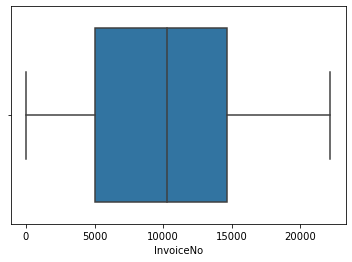

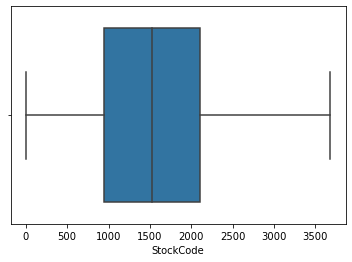

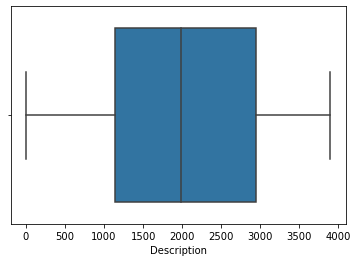

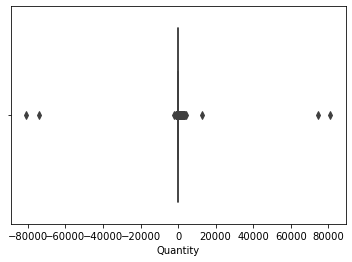

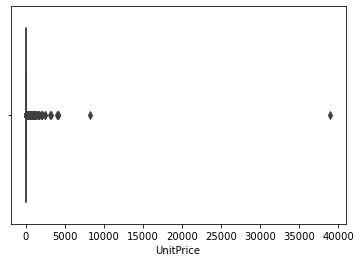

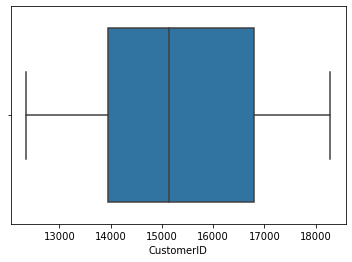

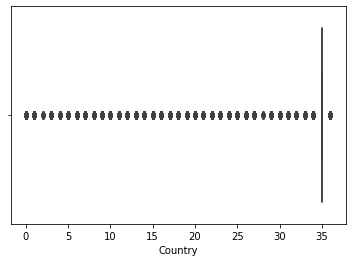

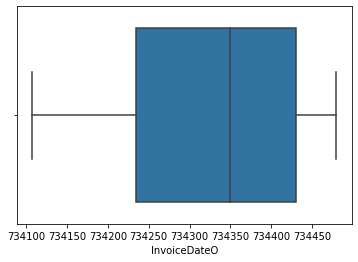

In [15]:
# Loop through each column in the DataFrame for outlier checking
for column in df[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country', 'InvoiceDateO']].columns:
    # Create a boxplot for the current column to visualize outliers
    sns.boxplot(data=df, x=column)
    plt.show()  # Display the boxplot to check for outliers


In [16]:
df[df["UnitPrice"]>5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,first_2_CID,InvoiceDateO
140723,20237,3681,2140,-1,2011-06-10 15:31:00,38970.00,15098.0,35,15,734298
239556,19848,3683,2624,-1,2011-05-03 12:51:00,8142.75,16029.0,35,16,734260


In [17]:
df[df['InvoiceDateO']==734298]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,first_2_CID,InvoiceDateO
1334,7929,13,2922,48,2011-06-10 16:37:00,0.85,12947.0,35,12,734298
35167,7888,14,2527,6,2011-06-10 08:24:00,2.95,15679.0,35,15,734298
201133,7888,15,463,6,2011-06-10 08:24:00,2.95,15679.0,35,15,734298
261935,7888,16,2658,6,2011-06-10 08:24:00,2.95,15679.0,35,15,734298
34423,7925,31,1843,10,2011-06-10 15:28:00,0.85,12712.0,14,12,734298
...,...,...,...,...,...,...,...,...,...,...
250912,7906,3325,3266,2,2011-06-10 11:44:00,0.42,16370.0,35,16,734298
66165,7894,3342,3072,12,2011-06-10 09:44:00,0.85,15114.0,35,15,734298
140723,20237,3681,2140,-1,2011-06-10 15:31:00,38970.00,15098.0,35,15,734298
24084,7925,3683,2624,4,2011-06-10 15:28:00,18.00,12712.0,14,12,734298


In [18]:
df.drop(labels=[239556],inplace=True)

### Using this value because the data is randomly selected in for training and testing so outliers can be used for trees based algorithm you will know more which algorithm is suitable at the bottom¶

In [19]:
df.drop(df[df["UnitPrice"]>10000].index,inplace=True) 
df.reset_index(drop=True,inplace=True)

In [20]:
df[df["UnitPrice"]==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,first_2_CID,InvoiceDateO
28365,14749,421,2377,5,2011-10-26 14:36:00,0.0,18059.0,35,18,734436
71517,4613,960,2040,5,2011-03-30 12:45:00,0.0,13113.0,35,13,734226
71823,4271,965,645,36,2011-03-23 10:25:00,0.0,13239.0,35,13,734219
75821,15881,992,2320,24,2011-11-10 11:49:00,0.0,13081.0,35,13,734451
76097,1521,993,2319,24,2011-01-06 16:41:00,0.0,13081.0,35,13,734143
84325,4838,1059,1612,2,2011-04-04 14:42:00,0.0,14410.0,35,14,734231
84436,9883,1064,6,1,2011-07-26 12:24:00,0.0,16818.0,35,16,734344
84493,1787,1065,2211,1,2011-01-13 15:10:00,0.0,15107.0,35,15,734150
104446,15398,1260,1774,12,2011-11-04 11:55:00,0.0,12431.0,0,12,734445
109125,1356,1292,2780,10,2010-12-21 13:45:00,0.0,14911.0,10,14,734127


In [21]:
df1[df1['Quantity']<0] #quantity cannot be negative it could be a grabage or the quantity is by mistake negative

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,first_2_CID,InvoiceDateO
36,20489,1102,3768,-12,2011-07-07 17:22:00,18072.0,35,18,734325
104,19675,3207,1325,-1,2011-04-11 13:43:00,13668.0,35,13,734238
125,20177,515,1940,-2,2011-06-05 12:01:00,15722.0,35,15,734293
175,19710,1739,3109,-1,2011-04-14 10:49:00,12982.0,35,12,734241
238,21020,1650,197,-1,2011-09-09 12:52:00,16173.0,35,16,734389
...,...,...,...,...,...,...,...,...,...
121786,20390,1621,1177,-2,2011-06-26 15:47:00,17731.0,35,17,734314
121790,21022,2079,3025,-1,2011-09-09 12:55:00,14210.0,35,14,734389
121795,20197,1923,2669,-5,2011-06-07 14:29:00,15189.0,35,15,734295
121912,19643,1805,1738,-1,2011-04-06 17:16:00,17438.0,35,17,734233


In [22]:
df['Quantity']=df['Quantity'].abs()
df1['Quantity']=df1['Quantity'].abs()
#quantity has negative which is invalid and also they are not garbage value 
#converting them to positive

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282157 entries, 0 to 282156
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     282157 non-null  int64         
 1   StockCode     282157 non-null  int64         
 2   Description   282157 non-null  int64         
 3   Quantity      282157 non-null  int64         
 4   InvoiceDate   282157 non-null  datetime64[ns]
 5   UnitPrice     282157 non-null  float64       
 6   CustomerID    282157 non-null  float64       
 7   Country       282157 non-null  int64         
 8   first_2_CID   282157 non-null  int64         
 9   InvoiceDateO  282157 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 21.5 MB


In [24]:
df1.describe()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,first_2_CID,InvoiceDateO
count,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000
mean,9940.419692,1572.955788,2026.412744,12.867201,15286.445256,32.836795,14.785766,734327.734426
std,5554.116349,845.106082,1087.697388,54.143504,1711.887591,6.726816,1.722477,112.906319
min,0.000000,0.000000,0.000000,1.000000,12347.000000,0.000000,12.000000,734107.000000
25%,5018.000000,937.000000,1147.000000,2.000000,13953.000000,35.000000,13.000000,734232.000000
50%,10311.000000,1523.000000,1987.000000,5.000000,15152.000000,35.000000,15.000000,734349.000000
75%,14635.000000,2106.000000,2945.000000,12.000000,16782.000000,35.000000,16.000000,734430.000000
max,22189.000000,3683.000000,3895.000000,9360.000000,18287.000000,36.000000,18.000000,734480.000000


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     122049 non-null  int64         
 1   StockCode     122049 non-null  int64         
 2   Description   122049 non-null  int64         
 3   Quantity      122049 non-null  int64         
 4   InvoiceDate   122049 non-null  datetime64[ns]
 5   CustomerID    122049 non-null  float64       
 6   Country       122049 non-null  int64         
 7   first_2_CID   122049 non-null  int64         
 8   InvoiceDateO  122049 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 8.4 MB


In [26]:
# Calculate Spearman correlation between UnitPrice and Quantity
spearmanr(df['UnitPrice'], df['Quantity'])

SpearmanrResult(correlation=-0.41418675352823625, pvalue=0.0)

## EDA

In [27]:
df.corr() 

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,first_2_CID,InvoiceDateO
InvoiceNo,1.000000,0.086640,0.024440,0.002228,0.013302,-0.007370,0.005273,-0.008907,0.941563
StockCode,0.086640,1.000000,-0.013283,0.002156,0.048244,0.003345,0.006327,0.003345,0.085122
Description,0.024440,-0.013283,1.000000,0.000794,-0.002610,-0.005037,-0.014644,-0.005749,0.027388
Quantity,0.002228,0.002156,0.000794,1.000000,-0.003000,-0.004713,-0.006750,-0.004311,-0.001218
UnitPrice,0.013302,0.048244,-0.002610,-0.003000,1.000000,-0.015882,-0.019614,-0.015915,-0.003204
CustomerID,-0.007370,0.003345,-0.005037,-0.004713,-0.015882,1.000000,0.388989,0.985823,-0.002616
Country,0.005273,0.006327,-0.014644,-0.006750,-0.019614,0.388989,1.000000,0.407111,0.006856
first_2_CID,-0.008907,0.003345,-0.005749,-0.004311,-0.015915,0.985823,0.407111,1.000000,-0.004323
InvoiceDateO,0.941563,0.085122,0.027388,-0.001218,-0.003204,-0.002616,0.006856,-0.004323,1.000000


### linear correlation is very less w.r.t unitprice with every variable so there could be a non linear correlation



In [28]:
from scipy.stats import spearmanr, pearsonr
spearmanr(df['UnitPrice'], df['Quantity'])

SpearmanrResult(correlation=-0.41418675352823625, pvalue=0.0)

<AxesSubplot:xlabel='Country', ylabel='UnitPrice'>

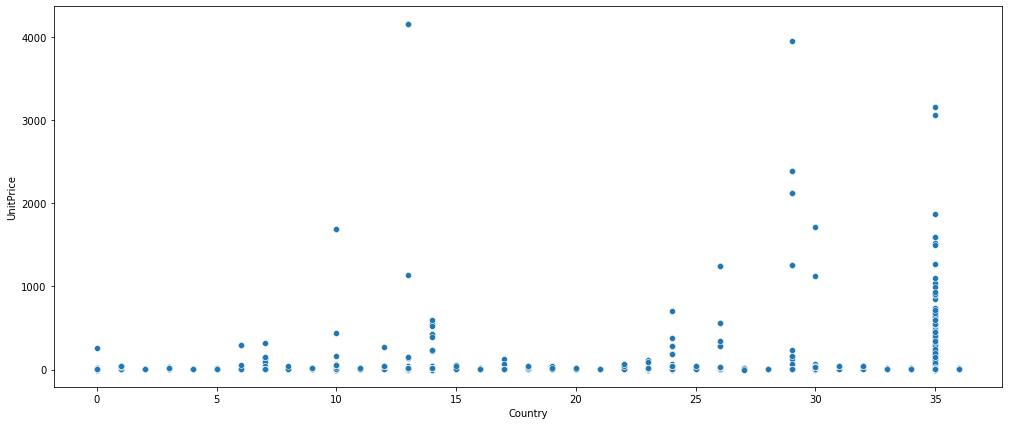

In [29]:
plt.figure(figsize=(17,7))
sns.scatterplot(x="Country",y="UnitPrice",data=df) 

<AxesSubplot:xlabel='CustomerID', ylabel='UnitPrice'>

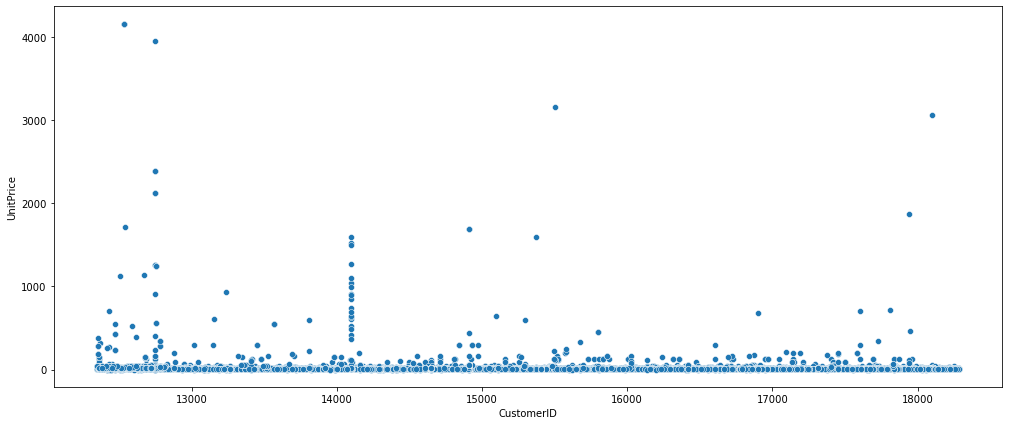

In [30]:
plt.figure(figsize=(17,7))
sns.scatterplot(x="CustomerID",y="UnitPrice",data=df) 

<AxesSubplot:xlabel='StockCode', ylabel='UnitPrice'>

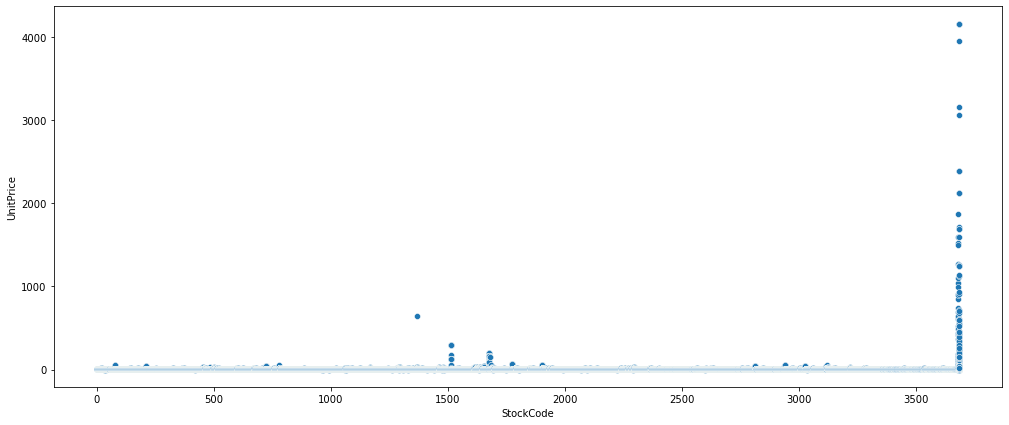

In [31]:
plt.figure(figsize=(17,7))
sns.scatterplot(x="StockCode",y="UnitPrice",data=df)

## Data Processing

In [32]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'CustomerID', 'Country', 'first_2_CID', 'InvoiceDateO'],
      dtype='object')

In [33]:
X_train = df[['InvoiceDateO', 'Quantity', 'StockCode', 'Description', 'Country', 'first_2_CID']]
y_train = df1[['InvoiceDateO', 'Quantity', 'StockCode', 'Description', 'Country', 'first_2_CID']]
X_test = df['UnitPrice'].values

In [34]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)
#X_test = sc.transform(X_test)

In [35]:
isolation_forest = IsolationForest(contamination=0.05)  # Adjust contamination based on domain knowledge
isolation_forest.fit(X_train)

IsolationForest(contamination=0.05)

## Predict outliers on the training dataset

In [36]:

outlier_predictions = isolation_forest.predict(X_train)

In [37]:
# Add outlier predictions as a new column in the training dataset
df['outlier'] = outlier_predictions

In [38]:
print(df)


        InvoiceNo  StockCode  Description  Quantity         InvoiceDate  \
0             403          0         1698        24 2010-12-06 08:42:00   
1            1010          0         1698         4 2010-12-14 13:35:00   
2             269          0         1698         1 2010-12-03 11:19:00   
3            1684          0         1698        12 2011-01-11 12:11:00   
4            1927          0         1698        24 2011-01-18 14:04:00   
...           ...        ...          ...       ...                 ...   
282152      14315       3683         2624         4 2011-10-19 13:02:00   
282153      16658       3683         2624         1 2011-11-18 11:10:00   
282154      14019       3683         2624         3 2011-10-14 11:39:00   
282155      11852       3683         2624        11 2011-09-09 09:13:00   
282156      15307       3683         2624         1 2011-11-03 13:44:00   

        UnitPrice  CustomerID  Country  first_2_CID  InvoiceDateO  outlier  
0            0.85     

In [39]:
outlier_column = df['outlier']
print(outlier_column)


0         1
1         1
2         1
3         1
4        -1
         ..
282152   -1
282153   -1
282154   -1
282155   -1
282156   -1
Name: outlier, Length: 282157, dtype: int32


## Visualize outlier detections

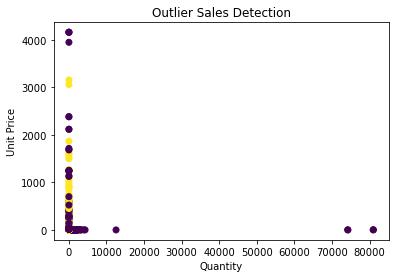

In [40]:

plt.scatter(df['Quantity'], df['UnitPrice'], c=outlier_predictions, cmap='viridis')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Outlier Sales Detection')
plt.show()